# Stock Prices Prediction Using Keras Long Term Short Memory

https://github.com/mwitiderrick/stockprice

https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = '/content/drive/My Drive/Colab Notebooks/RNN/stockTrain.csv'

In [4]:
# Importing the training set

dataset_train = pd.read_csv(filename)
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
dataset_train.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train
print(X_train.shape); print(y_train.shape)

(1975, 60)
(1975,)


In [8]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape); print(y_train.shape)

(1975, 60, 1)
(1975,)


In [9]:
# Part 2 - Building the RNN

model = tf.keras.models.Sequential([
                                  
  tf.keras.layers.LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)), 
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)), 
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.LSTM(50, input_shape = (X_train.shape[1], 1)), 
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='linear')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [10]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
62/62 [==============================] - 13s 121ms/step - loss: 0.0088
Epoch 2/100
62/62 [==============================] - 6s 97ms/step - loss: 0.0024
Epoch 3/100
62/62 [==============================] - 6s 95ms/step - loss: 0.0023
Epoch 4/100
62/62 [==============================] - 6s 92ms/step - loss: 0.0022
Epoch 5/100
62/62 [==============================] - 6s 95ms/step - loss: 0.0019
Epoch 6/100
62/62 [==============================] - 6s 93ms/step - loss: 0.0019
Epoch 7/100
62/62 [==============================] - 6s 93ms/step - loss: 0.0018
Epoch 8/100
62/62 [==============================] - 6s 96ms/step - loss: 0.0017
Epoch 9/100
62/62 [==============================] - 6s 94ms/step - loss: 0.0017
Epoch 10/100
62/62 [==============================] - 6s 98ms/step - loss: 0.0016
Epoch 11/100
62/62 [==============================] - 6s 94ms/step - loss: 0.0015
Epoch 12/100
62/62 [==============================] - 6s 96ms/step - loss: 0.0016
Epoch 13/100
62/62 [===

In [11]:
# Getting the real stock price of 2017
filename = '/content/drive/My Drive/Colab Notebooks/RNN/stockTest.csv'
dataset_test = pd.read_csv(filename)
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.shape

(16, 1)

In [12]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(16, 60, 1)

In [13]:
X_test.shape

(16, 60, 1)

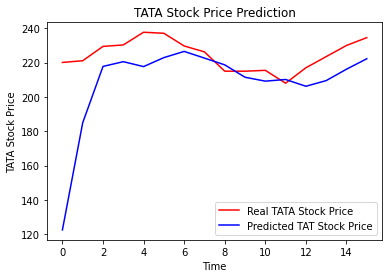

In [14]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()